# Energy spectrum scaling test

In this notebook, I will try out some ideas about the scaling relation between energy spectra and density fluctuations.

## 0 Packages and presets

In [1]:
import pandas as pd
import numpy as np
import os
import typesetting.main as tm
from log import experiment_log
from corr_utils import *
import matplotlib
from scipy.optimize import curve_fit

In [2]:
color_dict, marker_list = unified_symbols() # keep color and symbol consistent across different plot, for same concentrations
data_master_dir = 'H:\\' # data folder: Google drive for now, but may change in the future
tm.prl('1-column-2-panel') # control the default plotting configurations, now I realize the parameters should vary from plot to plot
# dirs = data_log_mapping(kw='aug') # video info for GNF raw data, obtained from Aug 3rd to Aug 6th
log_df = experiment_log()
n0_to_vf = 0.08
matplotlib.rcParams['text.usetex'] = True
vb = 1 # um^3

-------The log looks OK!--------


## 1 Try $\sqrt{E\phi}$

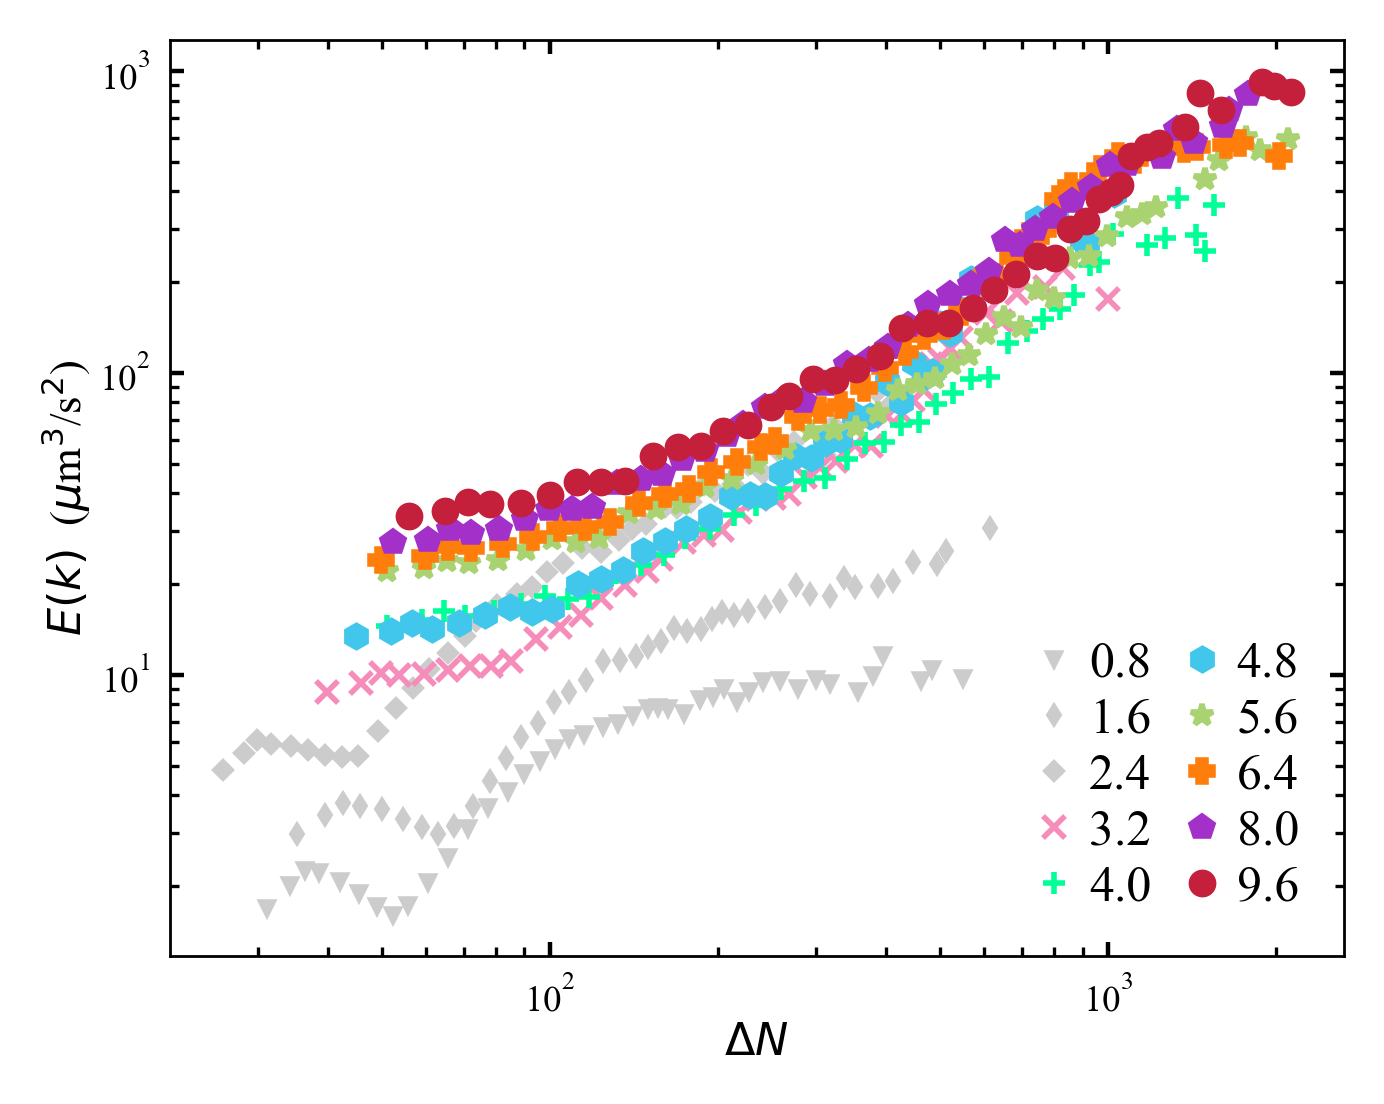

In [4]:
conc, folders, sample_num = tentative_log()
gnf_master_file = os.path.join(data_master_dir, 
                               r'DF\data\transient-GNF-energy-dN\{0}\df2_kinetics\{1:02d}\nGNF_data.csv')
es_master_file = os.path.join(data_master_dir, 
                               r'DF\data\transient-GNF-energy-dN\{0}\energy_spectra\{1:02d}\energy_spectra.csv')
bounds = [10, 3000]

fig, ax = plt.subplots(figsize=(3.5, 2.8))
for c, f, sn in zip(conc[::-1], folders[::-1], sample_num[::-1]):
    n = sn[2]
    gnf_data = pd.read_csv(gnf_master_file.format(f, n)).set_index('l_r')[bounds[0]: bounds[1]]
    es_data = pd.read_csv(es_master_file.format(f, n)).set_index('l_r')[bounds[0]: bounds[1]]
    gnf_plot = gnf_data.drop(labels=gnf_data.keys()[:-10], axis=1).mean(axis=1)
    es_plot = es_data.drop(labels=es_data.keys()[:-10], axis=1).mean(axis=1)
    es_mul_phi = es_plot * c * n0_to_vf
    if c > 30 and c != 85:
        ax.plot(gnf_plot, es_mul_phi ** 0.5, 
                ls='', marker=marker_list[color_dict[str(c)]], markersize=4, 
                color=wowcolor(color_dict[str(c)]), label='{:.1f}'.format(c*n0_to_vf))
    elif c <= 30:
        ax.plot(gnf_plot, es_mul_phi ** 0.5, 
                ls='', marker=marker_list[color_dict[str(c)]], markersize=2, 
                color=(0.8, 0.8, 0.8), label='{:.1f}'.format(c*n0_to_vf))
ax.loglog()
ax.legend(ncol=2, loc='lower right', fontsize=9)
ax.set_xlabel('$\Delta N$')
ax.set_ylabel('$E(k)$  ($\mu$m$^3$/s$^2$)')
plt.tight_layout()

# fitting curve
# p = np.array([ 0.30918824, -1.45846505,  4.89021747])
# x = np.logspace(1.8, 3.2)
# logx = np.log(x)
# y = np.exp(p[0]*logx**2 + p[1]*logx + p[2])
# ax.plot(x, y, ls='--', lw=1.5, color='black')

# fig.savefig(os.path.join(data_master_dir, r'Research projects\DF\Figures\GNF-energy-correlation\E-GNF-steady-dN.pdf'))

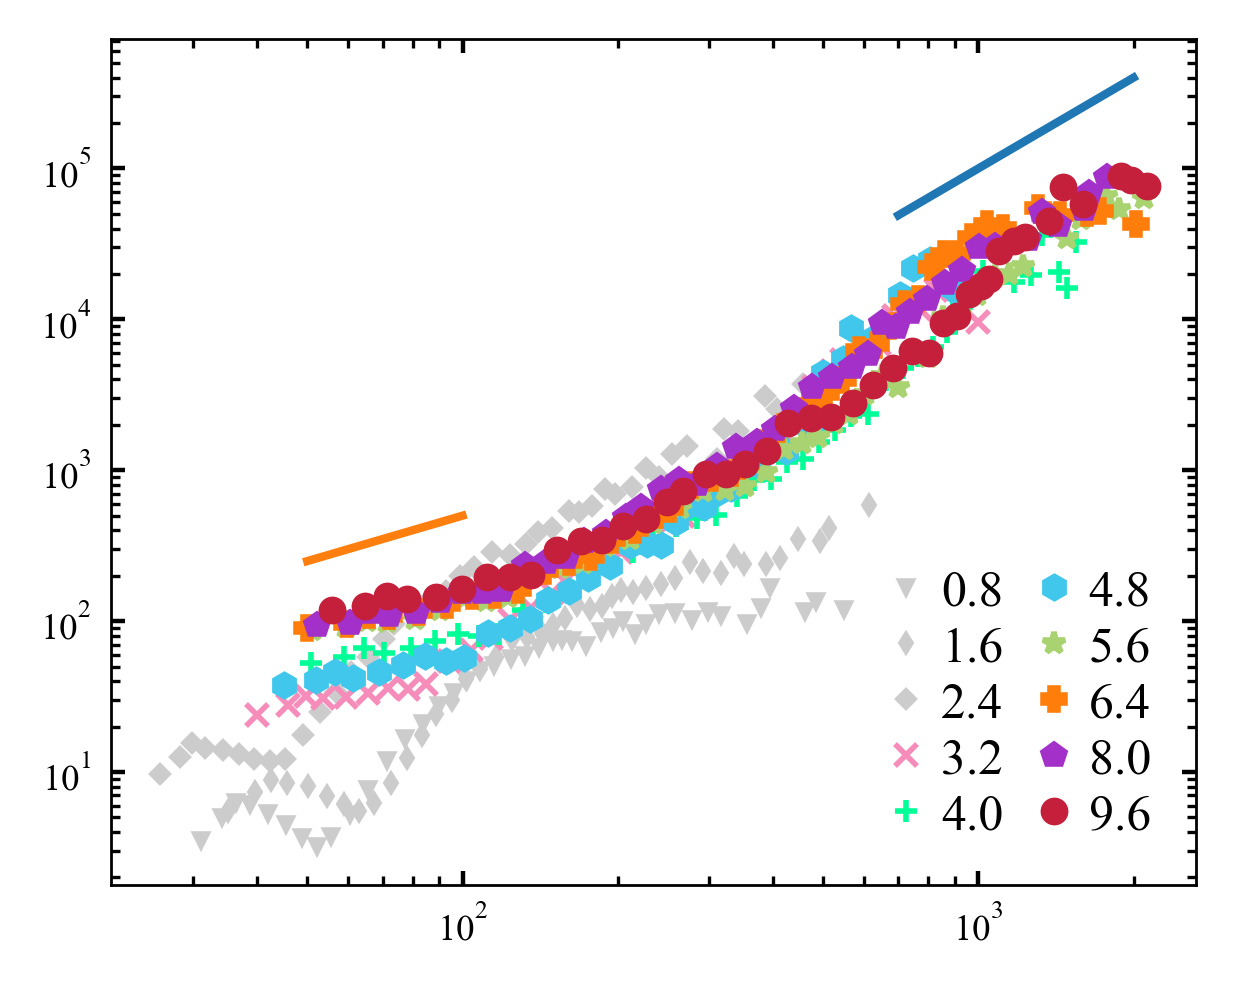

In [21]:
conc, folders, sample_num = tentative_log()
gnf_master_file = os.path.join(data_master_dir, 
                               r'DF\data\transient-GNF-energy-dN\{0}\df2_kinetics\{1:02d}\nGNF_data.csv')
es_master_file = os.path.join(data_master_dir, 
                               r'DF\data\transient-GNF-energy-dN\{0}\energy_spectra\{1:02d}\energy_spectra.csv')
bounds = [10, 3000]

fig, ax = plt.subplots(figsize=(3.5, 2.8))
for c, f, sn in zip(conc[::-1], folders[::-1], sample_num[::-1]):
    n = sn[2]
    gnf_data = pd.read_csv(gnf_master_file.format(f, n)).set_index('l_r')[bounds[0]: bounds[1]]
    es_data = pd.read_csv(es_master_file.format(f, n)).set_index('l_r')[bounds[0]: bounds[1]]
    gnf_plot = gnf_data.drop(labels=gnf_data.keys()[:-10], axis=1).mean(axis=1)
    es_plot = es_data.drop(labels=es_data.keys()[:-10], axis=1).mean(axis=1)
    if c > 30 and c != 85:
        ax.plot(gnf_plot, es_plot, 
                ls='', marker=marker_list[color_dict[str(c)]], markersize=4, 
                color=wowcolor(color_dict[str(c)]), label='{:.1f}'.format(c*n0_to_vf))
    elif c <= 30:
        ax.plot(gnf_plot, es_plot, 
                ls='', marker=marker_list[color_dict[str(c)]], markersize=2, 
                color=(0.8, 0.8, 0.8), label='{:.1f}'.format(c*n0_to_vf))
ax.loglog()
ax.legend(ncol=2, loc='lower right', fontsize=9)

x = np.array([700, 2000])
y = x ** 2 * 0.1
plt.plot(x, y)

x = np.array([50, 100])
y = x ** 1 *5
plt.plot(x, y)

## 2 Dimensionless energy: $\sqrt{E\phi/V_b}\tau$

Use density correlation time as $\tau$.

### 2.1 Fig 5A

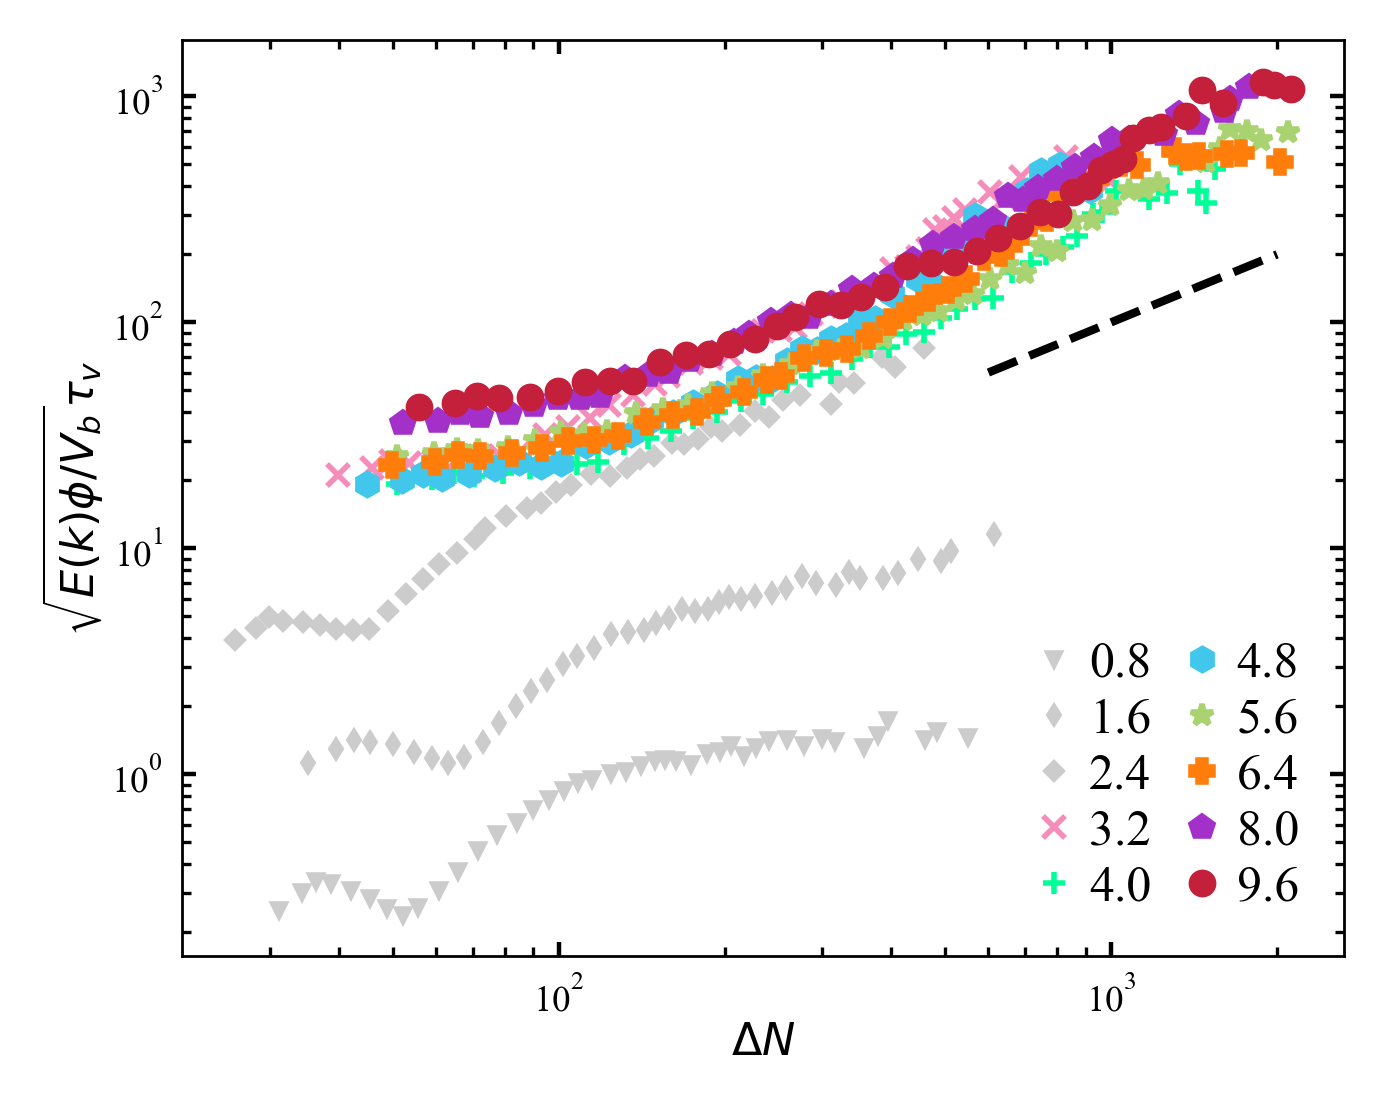

In [5]:
conc, folders, sample_num = tentative_log()
gnf_master_file = os.path.join(data_master_dir, 
                               r'DF\data\transient-GNF-energy-dN\{0}\df2_kinetics\{1:02d}\nGNF_data.csv')
es_master_file = os.path.join(data_master_dir, 
                               r'DF\data\transient-GNF-energy-dN\{0}\energy_spectra\{1:02d}\energy_spectra.csv')
cln_df = pd.read_csv(os.path.join(data_master_dir, 
                          r'DF\data\autocorrelation\density_autocorrelation_time.csv')).set_index('conc')
clv_df = pd.read_csv(os.path.join(data_master_dir, 
                          r'DF\data\autocorrelation\velocity_autocorrelation_time.csv')).set_index('conc')
bounds = [10, 3000]

fig, ax = plt.subplots(figsize=(3.5, 2.8))
for c, f, sn in zip(conc[::-1], folders[::-1], sample_num[::-1]):
    n = sn[2]
    gnf_data = pd.read_csv(gnf_master_file.format(f, n)).set_index('l_r')[bounds[0]: bounds[1]]
    es_data = pd.read_csv(es_master_file.format(f, n)).set_index('l_r')[bounds[0]: bounds[1]]
    gnf_plot = gnf_data.drop(labels=gnf_data.keys()[:-10], axis=1).mean(axis=1)
    es_plot = es_data.drop(labels=es_data.keys()[:-10], axis=1).mean(axis=1)
    tau = clv_df.loc[c].avg
    es_mul_phi = es_plot * c * n0_to_vf / vb 
    if c > 30 and c != 85:
        ax.plot(gnf_plot, es_mul_phi ** 0.5 * tau, 
                ls='', marker=marker_list[color_dict[str(c)]], markersize=4, 
                color=wowcolor(color_dict[str(c)]), label='{:.1f}'.format(c*n0_to_vf))
    elif c <= 30:
        ax.plot(gnf_plot, es_mul_phi ** 0.5 * tau, 
                ls='', marker=marker_list[color_dict[str(c)]], markersize=2, 
                color=(0.8, 0.8, 0.8), label='{:.1f}'.format(c*n0_to_vf))
ax.loglog()
ax.legend(ncol=2, loc='lower right', fontsize=9)
ax.set_xlabel('$\Delta N$')
ax.set_ylabel('$\sqrt{E(k)\phi/V_b}\\tau_v$')

x = np.array([600, 2000])
y = x ** 1 * 0.1
ax.plot(x, y, ls='--', lw=1.5, color='black')


plt.tight_layout()

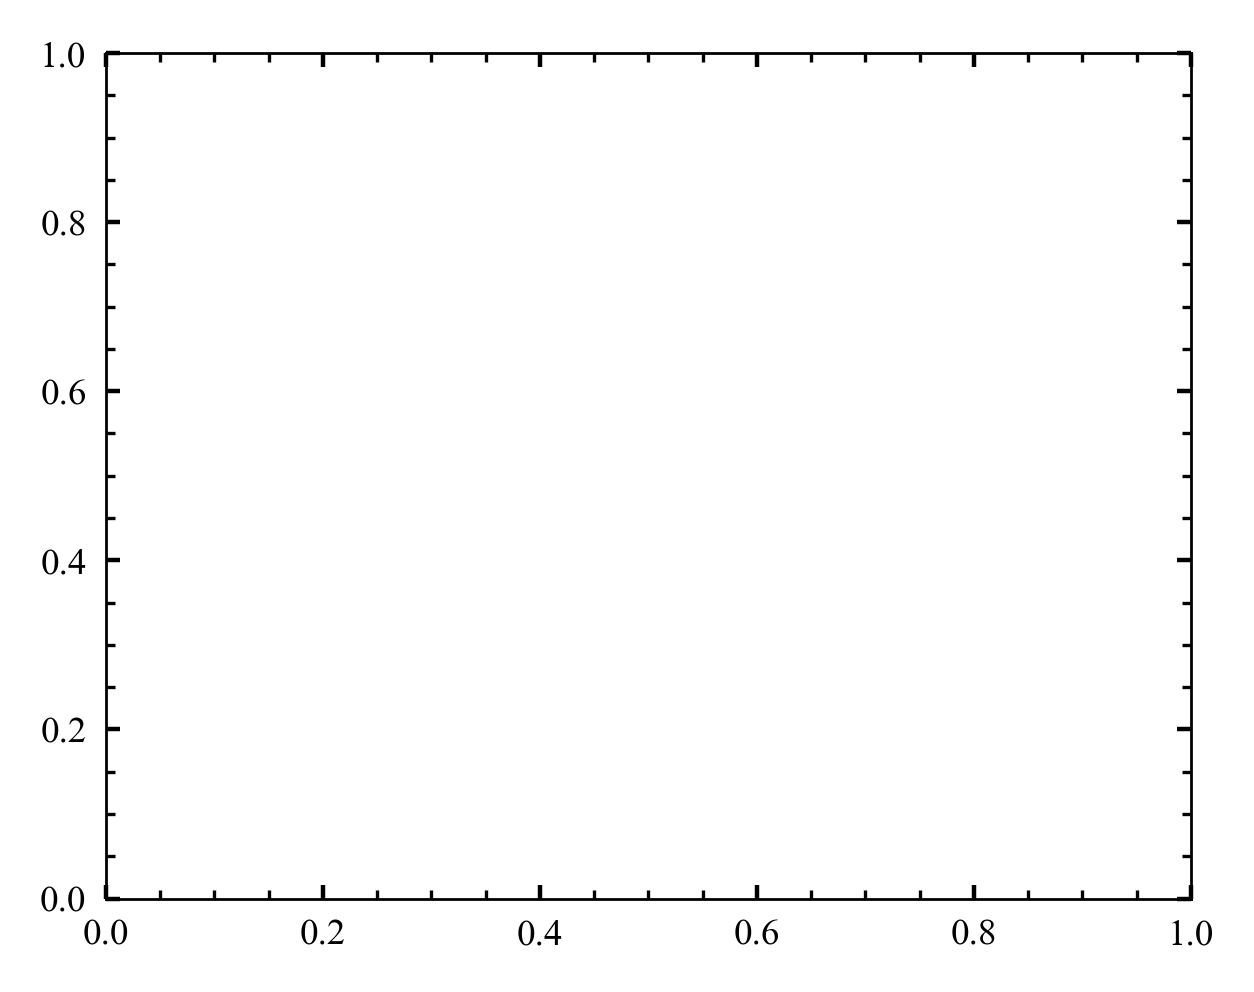

In [45]:
# fit the master curve with polynomial
conc, folders, sample_num = tentative_log()
gnf_master_file = os.path.join(data_master_dir, 
                               r'DF\data\transient-GNF-energy-dN\{0}\df2_kinetics\{1:02d}\nGNF_data.csv')
es_master_file = os.path.join(data_master_dir, 
                               r'DF\data\transient-GNF-energy-dN\{0}\energy_spectra\{1:02d}\energy_spectra.csv')
cln_df = pd.read_csv(os.path.join(data_master_dir, 
                          r'DF\data\autocorrelation\density_autocorrelation_time.csv')).set_index('conc')
clv_df = pd.read_csv(os.path.join(data_master_dir, 
                          r'DF\data\autocorrelation\velocity_autocorrelation_time.csv')).set_index('conc')
bounds = [10, 3000]

gnf_list = []
es_list = []

fig, ax = plt.subplots(figsize=(3.5, 2.8))
for c, f, sn in zip(conc[::-1], folders[::-1], sample_num[::-1]):
    n = sn[2]
    gnf_data = pd.read_csv(gnf_master_file.format(f, n)).set_index('l_r')[bounds[0]: bounds[1]]
    es_data = pd.read_csv(es_master_file.format(f, n)).set_index('l_r')[bounds[0]: bounds[1]]
    gnf_plot = gnf_data.drop(labels=gnf_data.keys()[:-10], axis=1).mean(axis=1)
    es_plot = es_data.drop(labels=es_data.keys()[:-10], axis=1).mean(axis=1)
    tau = clv_df.loc[c].avg
    es_mul_phi = es_plot * c * n0_to_vf / vb 
    if c > 30 and c != 85:
#         ax.plot(gnf_plot, es_mul_phi ** 0.5 * tau, 
#                 ls='', marker=marker_list[color_dict[str(c)]], markersize=4, 
#                 color=wowcolor(color_dict[str(c)]), label='{:.1f}'.format(c*n0_to_vf))
        gnf_list.append(gnf_plot)
        es_list.append(es_mul_phi ** 0.5 * tau)

x = np.concatenate(gnf_list)
y = np.concatenate(es_list)

In [46]:
ind = np.invert(np.isnan(y))
x1 = x[ind]
y1 = y[ind]
p = np.polyfit(np.log(x1), np.log(y1), deg=2)
p

array([ 0.13203157, -0.45837863,  2.84769051])

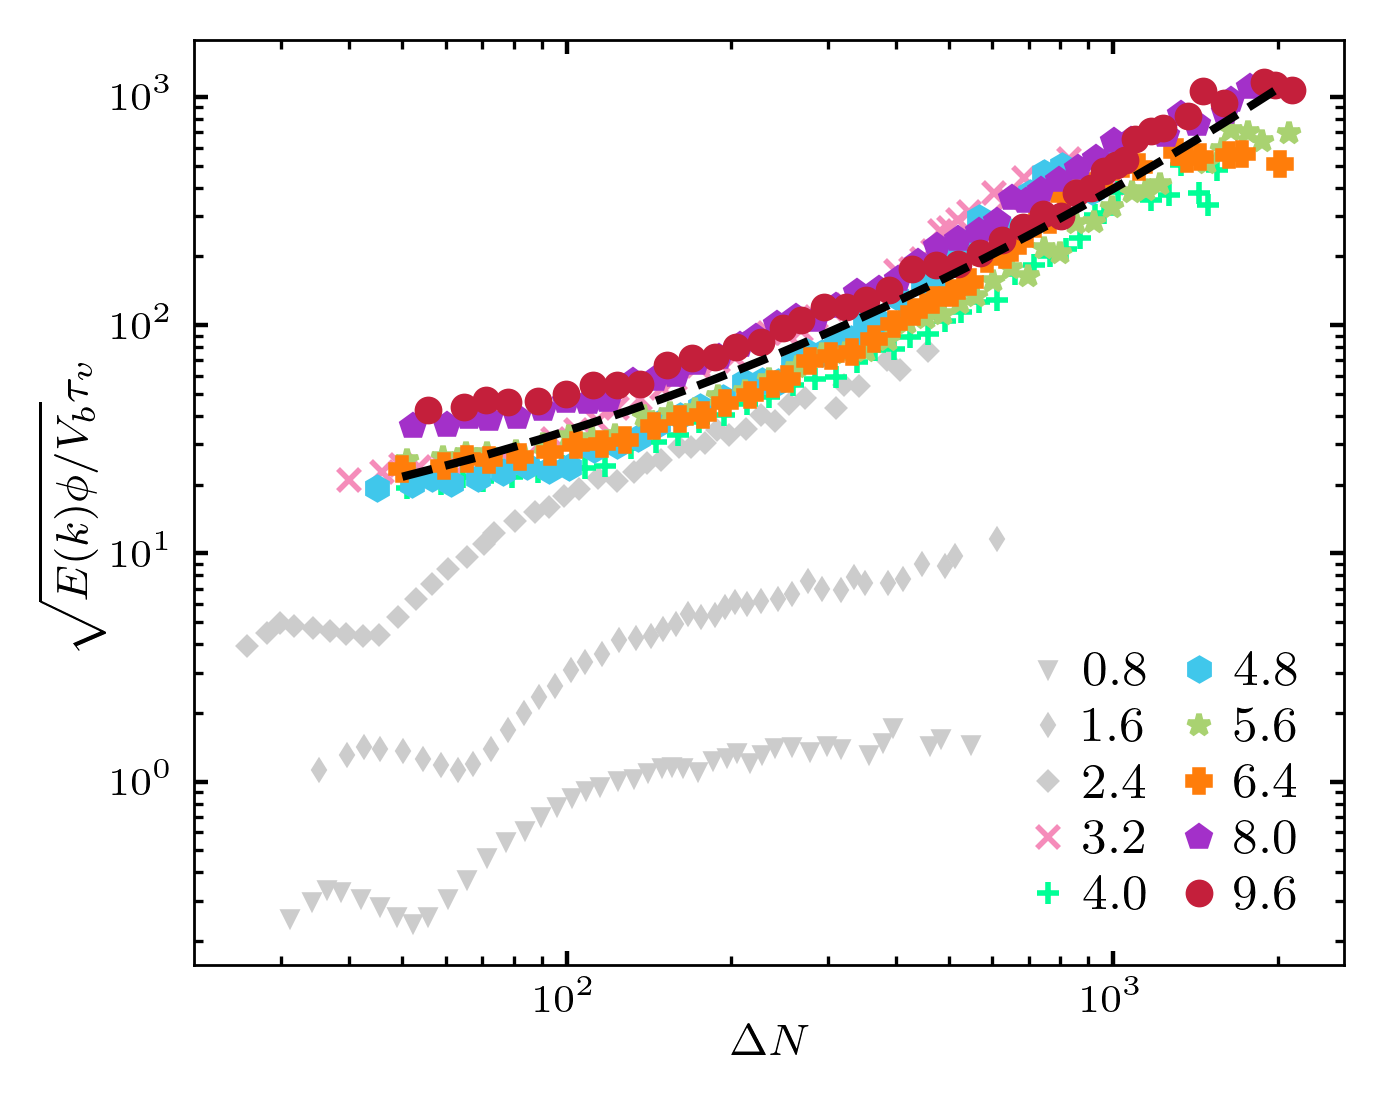

In [59]:
conc, folders, sample_num = tentative_log()
gnf_master_file = os.path.join(data_master_dir, 
                               r'Research projects\DF\data\transient-GNF-energy-dN\{0}\df2_kinetics\{1:02d}\nGNF_data.csv')
es_master_file = os.path.join(data_master_dir, 
                               r'Research projects\DF\data\transient-GNF-energy-dN\{0}\energy_spectra\{1:02d}\energy_spectra.csv')
cln_df = pd.read_csv(os.path.join(data_master_dir, 
                          r'Research projects\DF\data\autocorrelation\density_autocorrelation_time.csv')).set_index('conc')
clv_df = pd.read_csv(os.path.join(data_master_dir, 
                          r'Research projects\DF\data\autocorrelation\velocity_autocorrelation_time.csv')).set_index('conc')
bounds = [10, 3000]

fig, ax = plt.subplots(figsize=(3.5, 2.8))
for c, f, sn in zip(conc[::-1], folders[::-1], sample_num[::-1]):
    n = sn[2]
    gnf_data = pd.read_csv(gnf_master_file.format(f, n)).set_index('l_r')[bounds[0]: bounds[1]]
    es_data = pd.read_csv(es_master_file.format(f, n)).set_index('l_r')[bounds[0]: bounds[1]]
    gnf_plot = gnf_data.drop(labels=gnf_data.keys()[:-10], axis=1).mean(axis=1)
    es_plot = es_data.drop(labels=es_data.keys()[:-10], axis=1).mean(axis=1)
    tau = clv_df.loc[c].avg
    es_mul_phi = es_plot * c * n0_to_vf / vb 
    if c > 30 and c != 85:
        ax.plot(gnf_plot, es_mul_phi ** 0.5 * tau, 
                ls='', marker=marker_list[color_dict[str(c)]], markersize=4, 
                color=wowcolor(color_dict[str(c)]), label='{:.1f}'.format(c*n0_to_vf))
    elif c <= 30:
        ax.plot(gnf_plot, es_mul_phi ** 0.5 * tau, 
                ls='', marker=marker_list[color_dict[str(c)]], markersize=2, 
                color=(0.8, 0.8, 0.8), label='{:.1f}'.format(c*n0_to_vf))
ax.loglog()
ax.legend(ncol=2, loc='lower right', fontsize=9)
ax.set_xlabel('$\Delta N$')
ax.set_ylabel('$\sqrt{E(k)\phi/V_b}\\tau_v$')

x = np.linspace(50, 2000, 100)
y = np.exp(p[0] * np.log(x)**2 + p[1]*np.log(x) + p[2])
ax.plot(x, y, ls='--', lw=1.5, color='black')


plt.tight_layout()
fig.savefig(os.path.join(data_master_dir, r'Research projects\DF\Figures\GNF-energy-correlation\E-GNF-dimensionless.pdf'))

### 2.2 Fig 6D

In [60]:
cln_df = pd.read_csv(os.path.join(data_master_dir, 
                          r'Research projects\DF\data\autocorrelation\density_autocorrelation_time.csv')).set_index('conc')
clv_df = pd.read_csv(os.path.join(data_master_dir, 
                          r'Research projects\DF\data\autocorrelation\velocity_autocorrelation_time.csv')).set_index('conc')

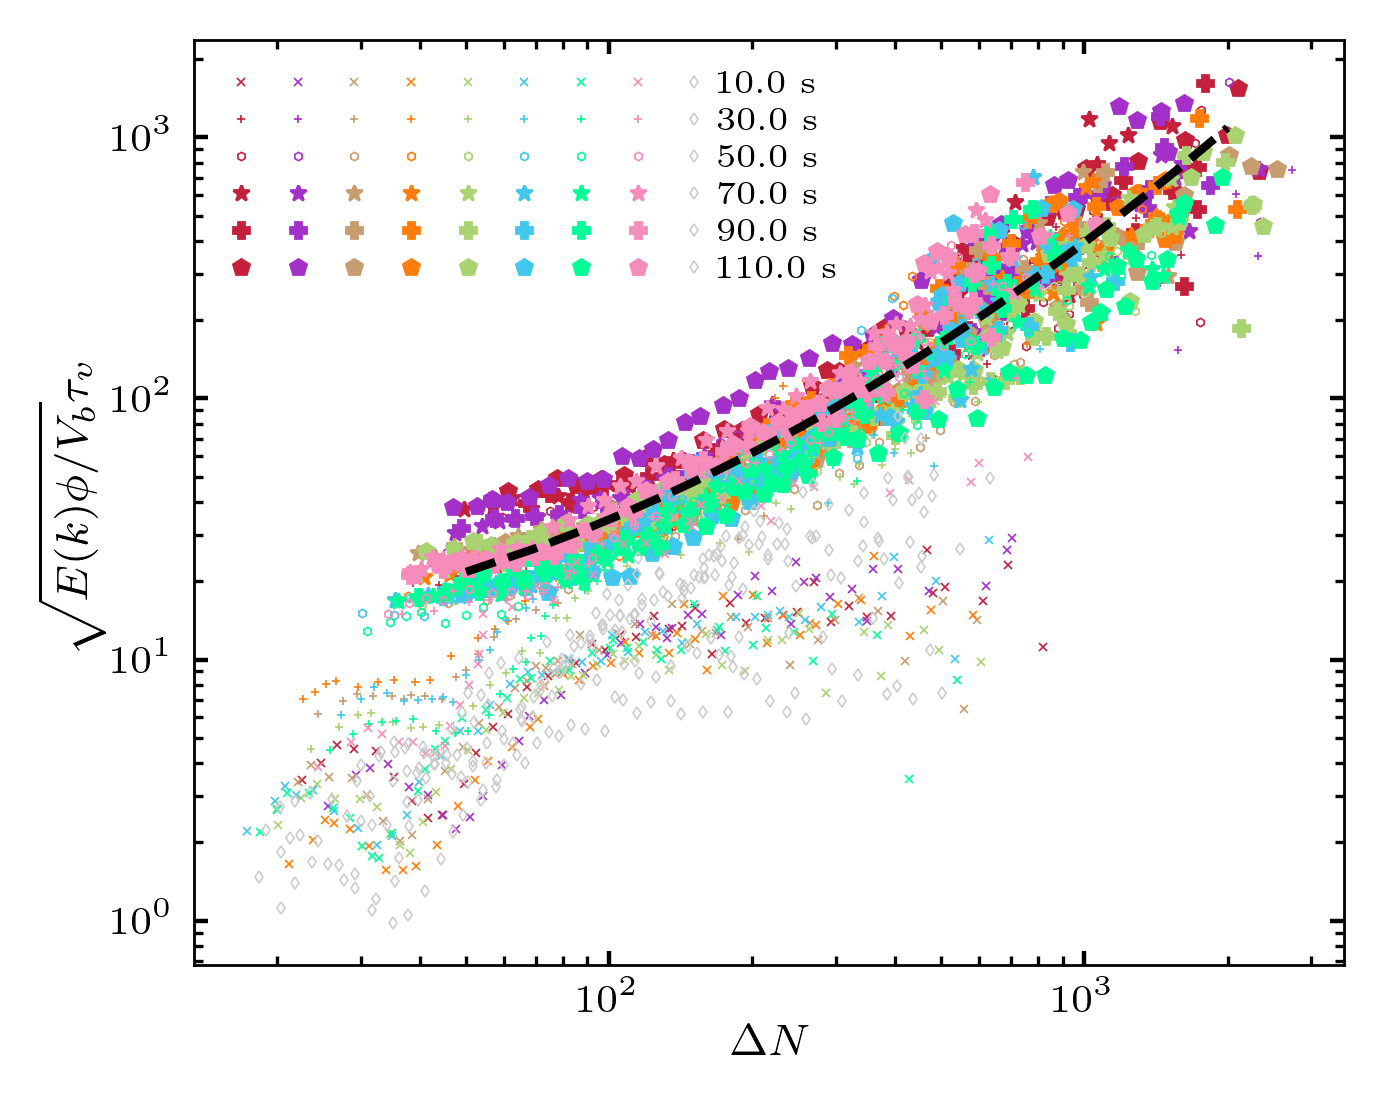

In [62]:
data_master = os.path.join(data_master_dir, r'Research projects\DF\data\transient-GNF-energy-dN\{1}\{0}\{2:02d}\{3}')
df_flag = 'df2_kinetics'
es_flag = 'energy_spectra'
df_file = 'nGNF_data.csv'
es_file = 'energy_spectra.csv'

df = {}
es = {}
conc, folders, sample_num = tentative_log()
for date, r, c in zip(folders, sample_num, conc):
    n = r[2]
    df[str(c)] = pd.read_csv(data_master.format(df_flag, date, n, df_file)).set_index('l_r')
    es[str(c)] = pd.read_csv(data_master.format(es_flag, date, n, es_file)).set_index('l_r').sort_index()
    
bounds = [10, 3000]
fig, ax = plt.subplots(figsize=(3.5, 2.8))
for sample_n, kw in enumerate(df):
    tau = clv_df.loc[int(kw)].avg
    if int(kw) > 30:
        for num, t in enumerate(range(300, 3500, 600)):
            if t < 2000:
                ax.plot(df[kw][str(t)][bounds[0]: bounds[1]], (es[kw][str(t)][bounds[0]: bounds[1]] * int(kw) * n0_to_vf / vb) ** 0.5 * tau, 
                        marker=marker_list[6-num], markersize=1.5, mfc=(0,0,0,0),
                        mew=0.3, mec=wowcolor(color_dict[kw]), ls='', label=' ')
            else:
                ax.plot(df[kw][str(t)][bounds[0]: bounds[1]], (es[kw][str(t)][bounds[0]: bounds[1]] * int(kw) * n0_to_vf / vb) ** 0.5 * tau, 
                        marker=marker_list[6-num], markersize=3, ls='', 
                        mew=0.5, label=' ', color=wowcolor(color_dict[kw]))
    elif int(kw) == 30:
        for num, t in enumerate(range(300, 3500, 600)):
            ax.plot(df[kw][str(t)][bounds[0]: bounds[1]], (es[kw][str(t)][bounds[0]: bounds[1]] * int(kw) * n0_to_vf / vb) ** 0.5 * tau, 
                    marker=marker_list[sample_n], markersize=1.5, mfc=(0,0,0,0),
                    mew=0.3, mec=(0.8, 0.8, 0.8), ls='', label='{:.1f} s'.format(t/30))
ax.legend(loc='upper left', fontsize=6, ncol=9)
ax.loglog()

ax.set_xlabel('$\Delta N$')
ax.set_ylabel('$\sqrt{E(k)\phi/V_b}\\tau_v$')

# ax.set_xlim([1, 16])
# ax.set_ylim([1e-5, 5e0])

# fitting curve
x = np.linspace(50, 2000, 100)
y = np.exp(p[0] * np.log(x)**2 + p[1]*np.log(x) + p[2])
ax.plot(x, y, ls='--', lw=1.5, color='black')

# slope
# x = np.array([600, 2000])
# y = x ** 1 * 0.1
# ax.plot(x, y, ls='--', lw=1.5, color='black')

plt.tight_layout()

fig.savefig(os.path.join(data_master_dir, r'Research projects\DF\Figures\GNF-energy-correlation-transient\E-GNF-dimensionless-transient.pdf'))

## 3 $\sqrt{nE(k)}$

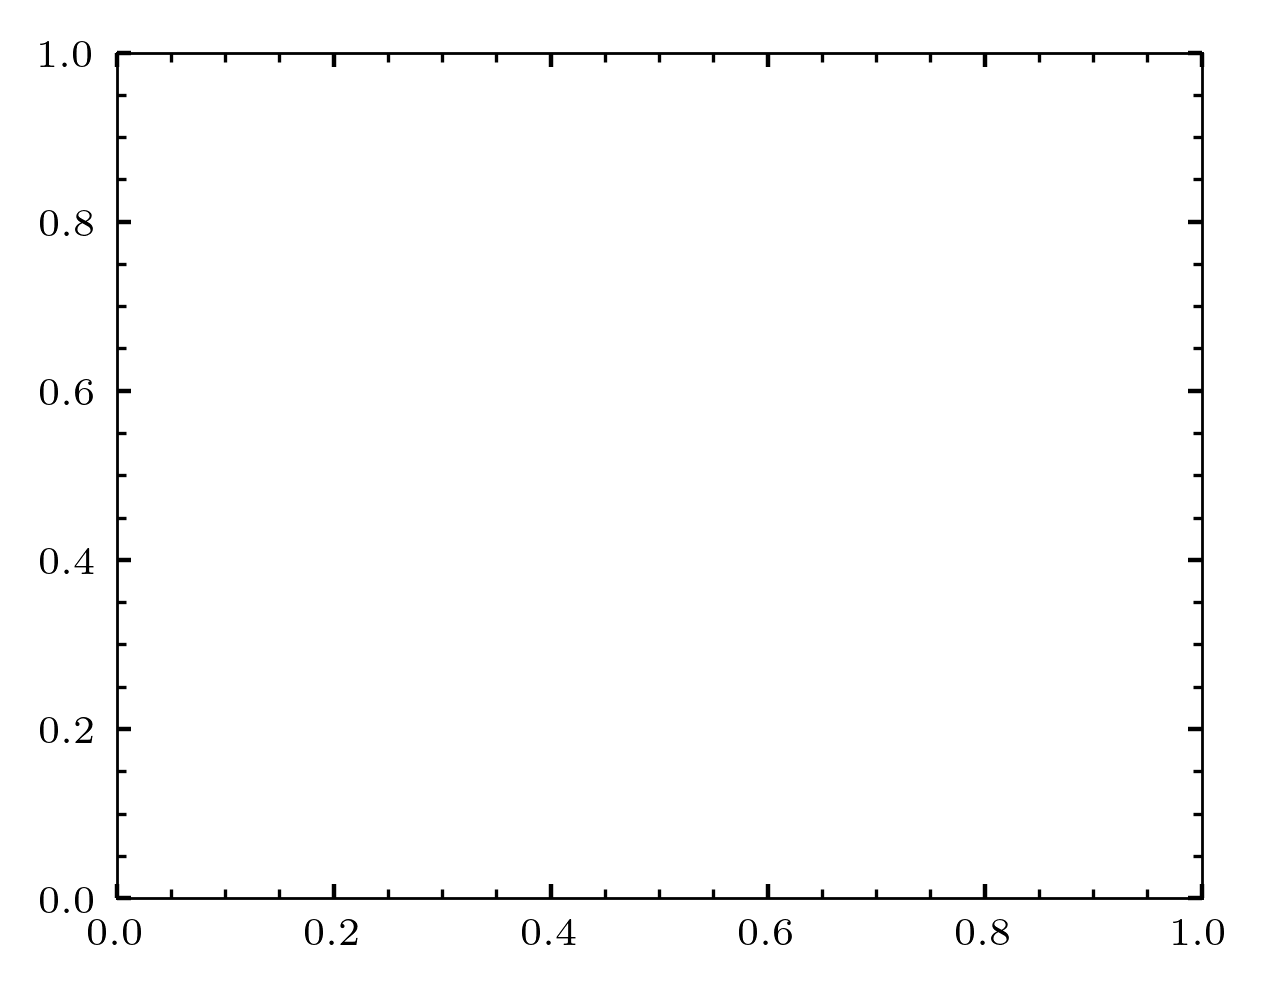

In [14]:
# fit the master curve with polynomial
conc, folders, sample_num = tentative_log()
gnf_master_file = os.path.join(data_master_dir, 
                               r'Research projects\DF\data\transient-GNF-energy-dN\{0}\df2_kinetics\{1:02d}\nGNF_data.csv')
es_master_file = os.path.join(data_master_dir, 
                               r'Research projects\DF\data\transient-GNF-energy-dN\{0}\energy_spectra\{1:02d}\energy_spectra.csv')
cln_df = pd.read_csv(os.path.join(data_master_dir, 
                          r'Research projects\DF\data\autocorrelation\density_autocorrelation_time.csv')).set_index('conc')
clv_df = pd.read_csv(os.path.join(data_master_dir, 
                          r'Research projects\DF\data\autocorrelation\velocity_autocorrelation_time.csv')).set_index('conc')
bounds = [10, 3000]

gnf_list = []
es_list = []

fig, ax = plt.subplots(figsize=(3.5, 2.8))
for c, f, sn in zip(conc[::-1], folders[::-1], sample_num[::-1]):
    n = sn[2]
    gnf_data = pd.read_csv(gnf_master_file.format(f, n)).set_index('l_r')[bounds[0]: bounds[1]]
    es_data = pd.read_csv(es_master_file.format(f, n)).set_index('l_r')[bounds[0]: bounds[1]]
    gnf_plot = gnf_data.drop(labels=gnf_data.keys()[:-10], axis=1).mean(axis=1)
    es_plot = es_data.drop(labels=es_data.keys()[:-10], axis=1).mean(axis=1)
    tau = clv_df.loc[c].avg
    es_mul_phi = es_plot * c * n0_to_vf / 100 / vb 
    if c > 30 and c != 85:
#         ax.plot(gnf_plot, es_mul_phi ** 0.5 * tau, 
#                 ls='', marker=marker_list[color_dict[str(c)]], markersize=4, 
#                 color=wowcolor(color_dict[str(c)]), label='{:.1f}'.format(c*n0_to_vf))
        gnf_list.append(gnf_plot)
        es_list.append(es_mul_phi ** 0.5)

x = np.concatenate(gnf_list)
y = np.concatenate(es_list)

In [15]:
ind = np.invert(np.isnan(y))
x1 = x[ind]
y1 = y[ind]
p = np.polyfit(np.log(x1), np.log(y1), deg=2)
p

array([ 0.15352471, -0.65807617,  0.65267781])

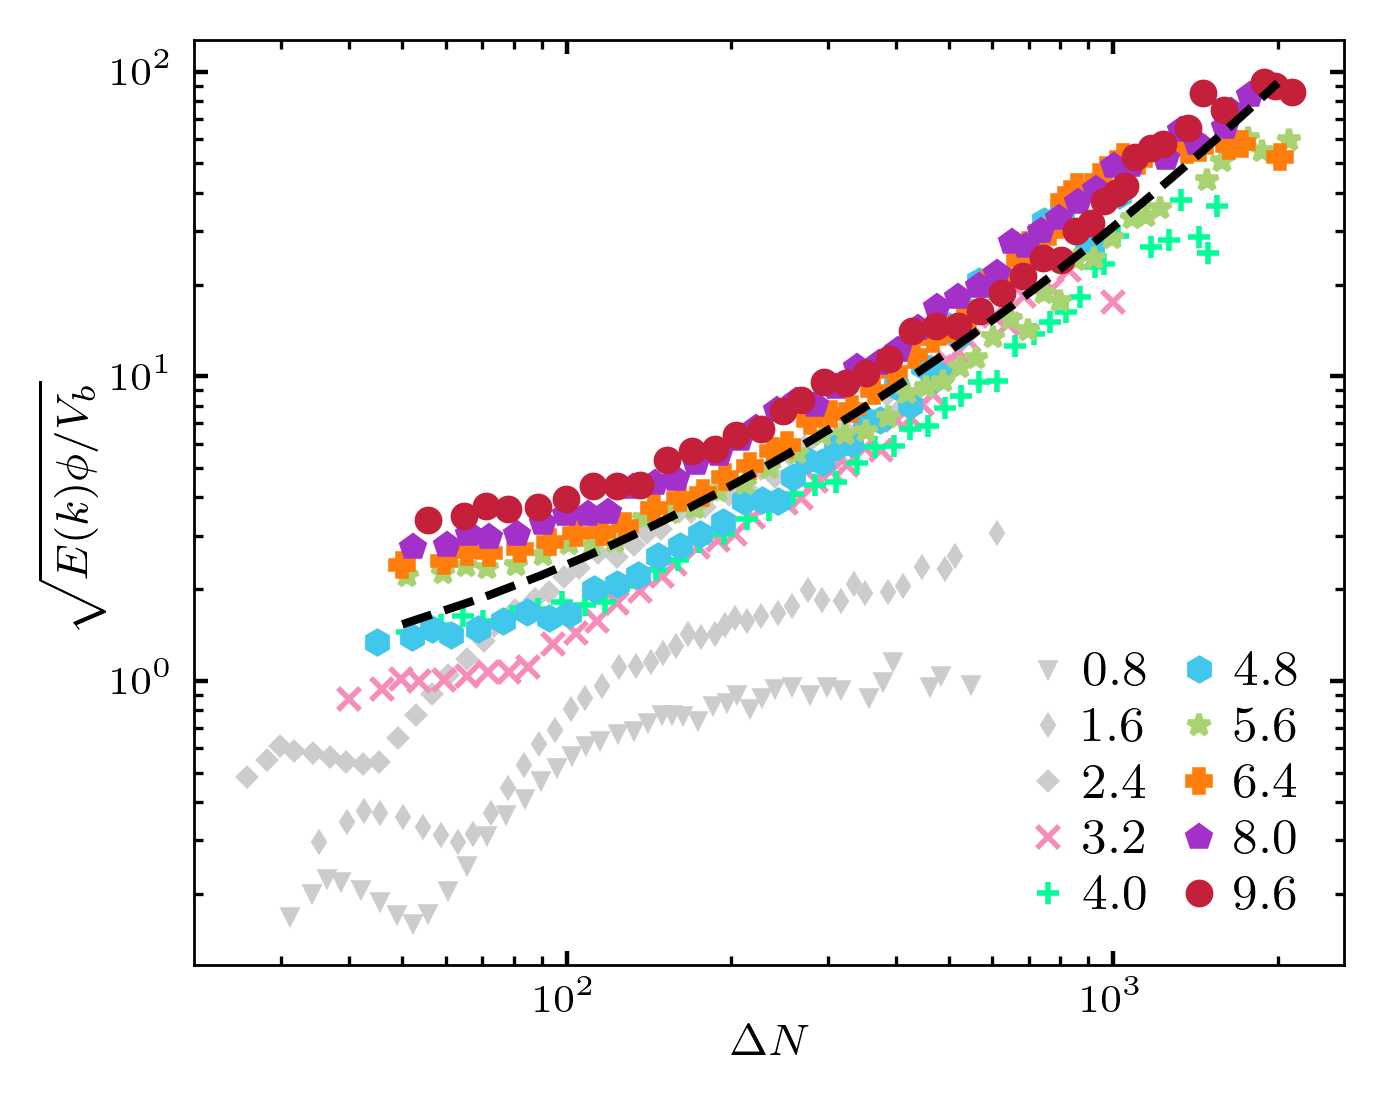

In [70]:
conc, folders, sample_num = tentative_log()
gnf_master_file = os.path.join(data_master_dir, 
                               r'Research projects\DF\data\transient-GNF-energy-dN\{0}\df2_kinetics\{1:02d}\nGNF_data.csv')
es_master_file = os.path.join(data_master_dir, 
                               r'Research projects\DF\data\transient-GNF-energy-dN\{0}\energy_spectra\{1:02d}\energy_spectra.csv')
cln_df = pd.read_csv(os.path.join(data_master_dir, 
                          r'Research projects\DF\data\autocorrelation\density_autocorrelation_time.csv')).set_index('conc')
clv_df = pd.read_csv(os.path.join(data_master_dir, 
                          r'Research projects\DF\data\autocorrelation\velocity_autocorrelation_time.csv')).set_index('conc')
bounds = [10, 3000]

fig, ax = plt.subplots(figsize=(3.5, 2.8))
for c, f, sn in zip(conc[::-1], folders[::-1], sample_num[::-1]):
    n = sn[2]
    gnf_data = pd.read_csv(gnf_master_file.format(f, n)).set_index('l_r')[bounds[0]: bounds[1]]
    es_data = pd.read_csv(es_master_file.format(f, n)).set_index('l_r')[bounds[0]: bounds[1]]
    gnf_plot = gnf_data.drop(labels=gnf_data.keys()[:-10], axis=1).mean(axis=1)
    es_plot = es_data.drop(labels=es_data.keys()[:-10], axis=1).mean(axis=1)
    tau = clv_df.loc[c].avg
    es_mul_phi = es_plot * c * n0_to_vf / 100 / vb 
    if c > 30 and c != 85:
        ax.plot(gnf_plot, es_mul_phi ** 0.5 , 
                ls='', marker=marker_list[color_dict[str(c)]], markersize=4, 
                color=wowcolor(color_dict[str(c)]), label='{:.1f}'.format(c*n0_to_vf))
    elif c <= 30:
        ax.plot(gnf_plot, es_mul_phi ** 0.5, 
                ls='', marker=marker_list[color_dict[str(c)]], markersize=2, 
                color=(0.8, 0.8, 0.8), label='{:.1f}'.format(c*n0_to_vf))
ax.loglog()
ax.legend(ncol=2, loc='lower right', fontsize=9)
ax.set_xlabel('$\Delta N$')
ax.set_ylabel('$\sqrt{E(k)\phi/V_b}$')

x = np.linspace(50, 2000, 100)
y = np.exp(p[0] * np.log(x)**2 + p[1]*np.log(x) + p[2])
ax.plot(x, y, ls='--', lw=1.5, color='black')


plt.tight_layout()
fig.savefig(os.path.join(data_master_dir, r'Research projects\DF\Figures\GNF-energy-correlation\E-GNF-sqrtnE.pdf'))

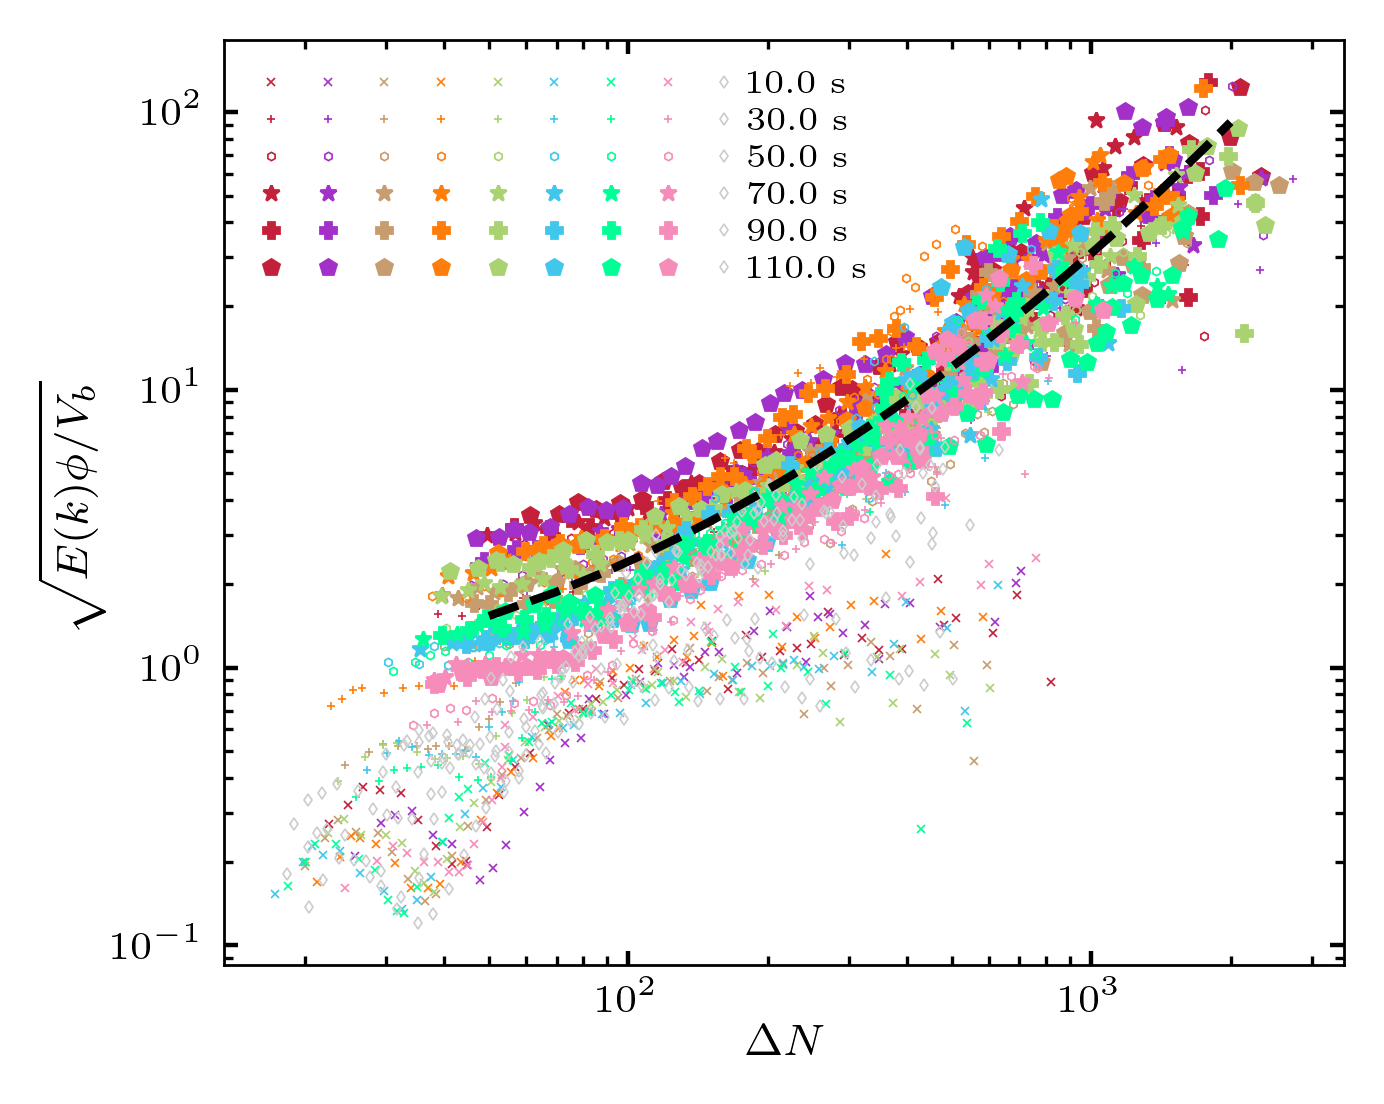

In [73]:
data_master = os.path.join(data_master_dir, r'Research projects\DF\data\transient-GNF-energy-dN\{1}\{0}\{2:02d}\{3}')
df_flag = 'df2_kinetics'
es_flag = 'energy_spectra'
df_file = 'nGNF_data.csv'
es_file = 'energy_spectra.csv'

df = {}
es = {}
conc, folders, sample_num = tentative_log()
for date, r, c in zip(folders, sample_num, conc):
    n = r[2]
    df[str(c)] = pd.read_csv(data_master.format(df_flag, date, n, df_file)).set_index('l_r')
    es[str(c)] = pd.read_csv(data_master.format(es_flag, date, n, es_file)).set_index('l_r').sort_index()
    
bounds = [10, 3000]
fig, ax = plt.subplots(figsize=(3.5, 2.8))
for sample_n, kw in enumerate(df):
    tau = clv_df.loc[int(kw)].avg
    if int(kw) > 30:
        for num, t in enumerate(range(300, 3500, 600)):
            if t < 2000:
                ax.plot(df[kw][str(t)][bounds[0]: bounds[1]], (es[kw][str(t)][bounds[0]: bounds[1]] * int(kw) * n0_to_vf / 100 / vb) ** 0.5, 
                        marker=marker_list[6-num], markersize=1.5, mfc=(0,0,0,0),
                        mew=0.3, mec=wowcolor(color_dict[kw]), ls='', label=' ')
            else:
                ax.plot(df[kw][str(t)][bounds[0]: bounds[1]], (es[kw][str(t)][bounds[0]: bounds[1]] * int(kw) * n0_to_vf / 100 / vb) ** 0.5, 
                        marker=marker_list[6-num], markersize=3, ls='', 
                        mew=0.5, label=' ', color=wowcolor(color_dict[kw]))
    elif int(kw) == 30:
        for num, t in enumerate(range(300, 3500, 600)):
            ax.plot(df[kw][str(t)][bounds[0]: bounds[1]], (es[kw][str(t)][bounds[0]: bounds[1]] * int(kw) * n0_to_vf / 100 / vb) ** 0.5, 
                    marker=marker_list[sample_n], markersize=1.5, mfc=(0,0,0,0),
                    mew=0.3, mec=(0.8, 0.8, 0.8), ls='', label='{:.1f} s'.format(t/30))
ax.legend(loc='upper left', fontsize=6, ncol=9)
ax.loglog()

ax.set_xlabel('$\Delta N$')
ax.set_ylabel('$\sqrt{E(k)\phi/V_b}$')

# ax.set_xlim([1, 16])
# ax.set_ylim([1e-5, 5e0])

# fitting curve
x = np.linspace(50, 2000, 100)
y = np.exp(p[0] * np.log(x)**2 + p[1]*np.log(x) + p[2])
ax.plot(x, y, ls='--', lw=1.5, color='black')

# slope
# x = np.array([600, 2000])
# y = x ** 1 * 0.1
# ax.plot(x, y, ls='--', lw=1.5, color='black')

plt.tight_layout()

fig.savefig(os.path.join(data_master_dir, r'Research projects\DF\Figures\GNF-energy-correlation-transient\E-GNF-sqrtnE-transient.pdf'))

## 4 Try different scaling exponent $\alpha$

It's hypothesized that $n^{1-\alpha} E(k)^\alpha$ will collapse different concentration curves. We test different $\alpha$ here from 0.5 to 1, hoping to find a good collapse.

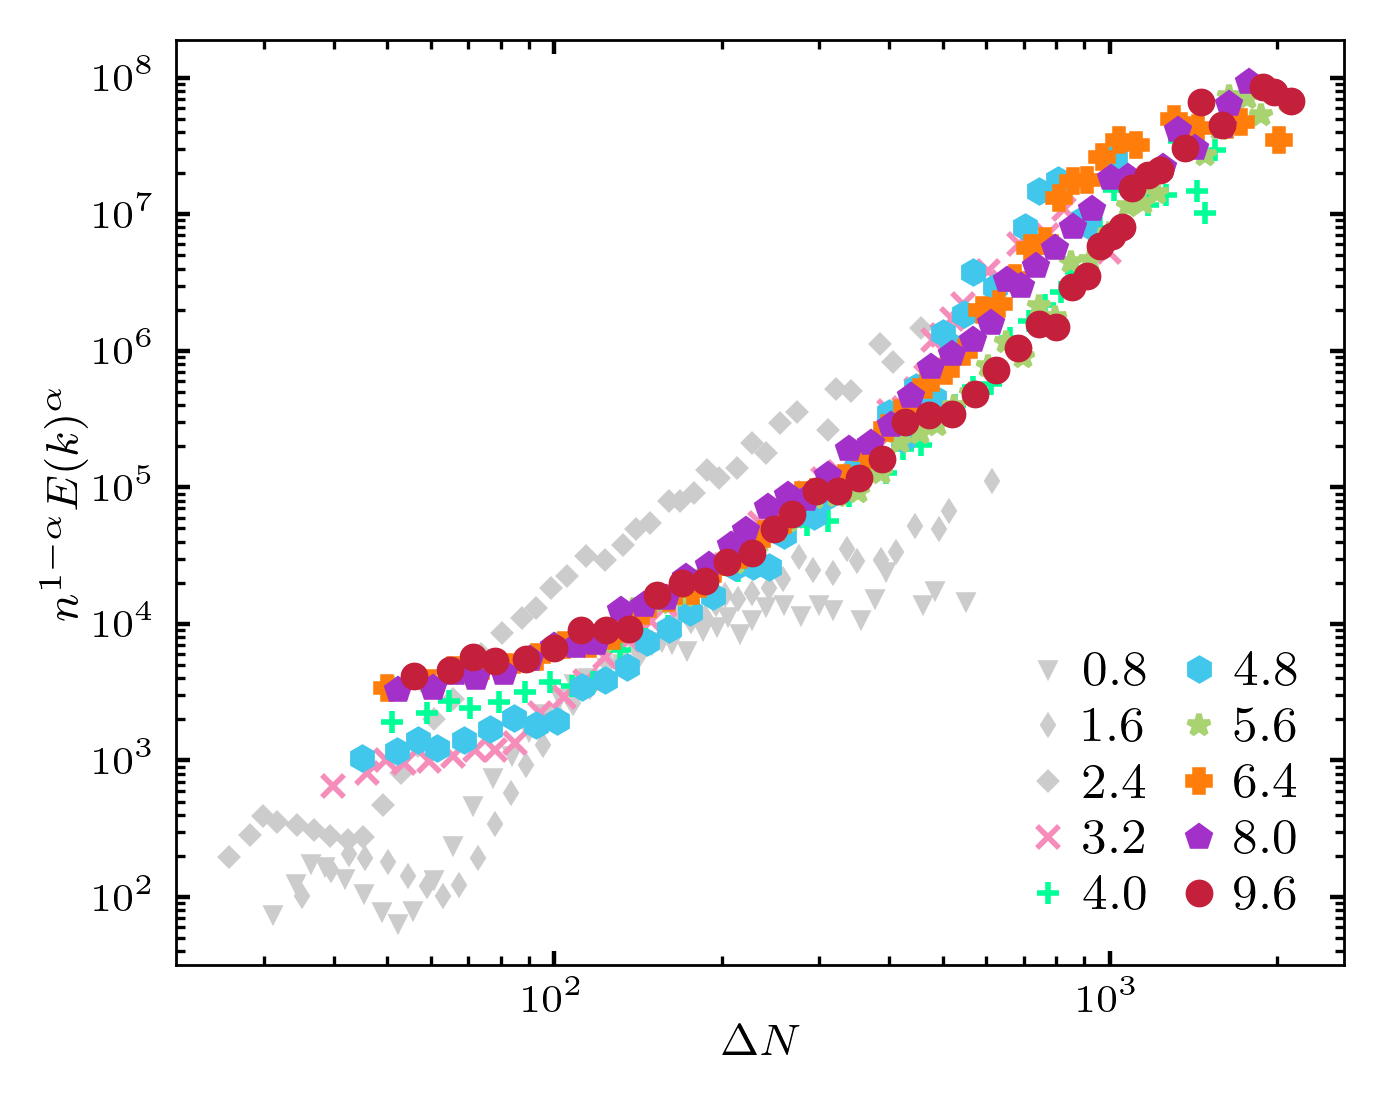

In [29]:
conc, folders, sample_num = tentative_log()
gnf_master_file = os.path.join(data_master_dir, 
                               r'Research projects\DF\data\transient-GNF-energy-dN\{0}\df2_kinetics\{1:02d}\nGNF_data.csv')
es_master_file = os.path.join(data_master_dir, 
                               r'Research projects\DF\data\transient-GNF-energy-dN\{0}\energy_spectra\{1:02d}\energy_spectra.csv')
cln_df = pd.read_csv(os.path.join(data_master_dir, 
                          r'Research projects\DF\data\autocorrelation\density_autocorrelation_time.csv')).set_index('conc')
clv_df = pd.read_csv(os.path.join(data_master_dir, 
                          r'Research projects\DF\data\autocorrelation\velocity_autocorrelation_time.csv')).set_index('conc')
bounds = [10, 3000]
alpha = 1.5

fig, ax = plt.subplots(figsize=(3.5, 2.8))
for c, f, sn in zip(conc[::-1], folders[::-1], sample_num[::-1]):
    n = sn[2]
    gnf_data = pd.read_csv(gnf_master_file.format(f, n)).set_index('l_r')[bounds[0]: bounds[1]]
    es_data = pd.read_csv(es_master_file.format(f, n)).set_index('l_r')[bounds[0]: bounds[1]]
    gnf_plot = gnf_data.drop(labels=gnf_data.keys()[:-10], axis=1).mean(axis=1)
    es_plot = es_data.drop(labels=es_data.keys()[:-10], axis=1).mean(axis=1)
    n = c * n0_to_vf / 100 / vb 
    if c > 30 and c != 85:
        ax.plot(gnf_plot, n ** (1-alpha) * es_plot ** alpha, 
                ls='', marker=marker_list[color_dict[str(c)]], markersize=4, 
                color=wowcolor(color_dict[str(c)]), label='{:.1f}'.format(c*n0_to_vf))
    elif c <= 30:
        ax.plot(gnf_plot, n ** (1-alpha) * es_plot ** alpha, 
                ls='', marker=marker_list[color_dict[str(c)]], markersize=2, 
                color=(0.8, 0.8, 0.8), label='{:.1f}'.format(c*n0_to_vf))
ax.loglog()
ax.legend(ncol=2, loc='lower right', fontsize=9)
ax.set_xlabel('$\Delta N$')
ax.set_ylabel('$n^{1-\\alpha}E(k)^\\alpha$')

# x = np.linspace(50, 2000, 100)
# y = np.exp(p[0] * np.log(x)**2 + p[1]*np.log(x) + p[2])
# ax.plot(x, y, ls='--', lw=1.5, color='black')


plt.tight_layout()
fig.savefig(os.path.join(data_master_dir, r'Research projects\DF\Figures\GNF-energy-correlation\E-GNF-alpha-1.5.pdf'))

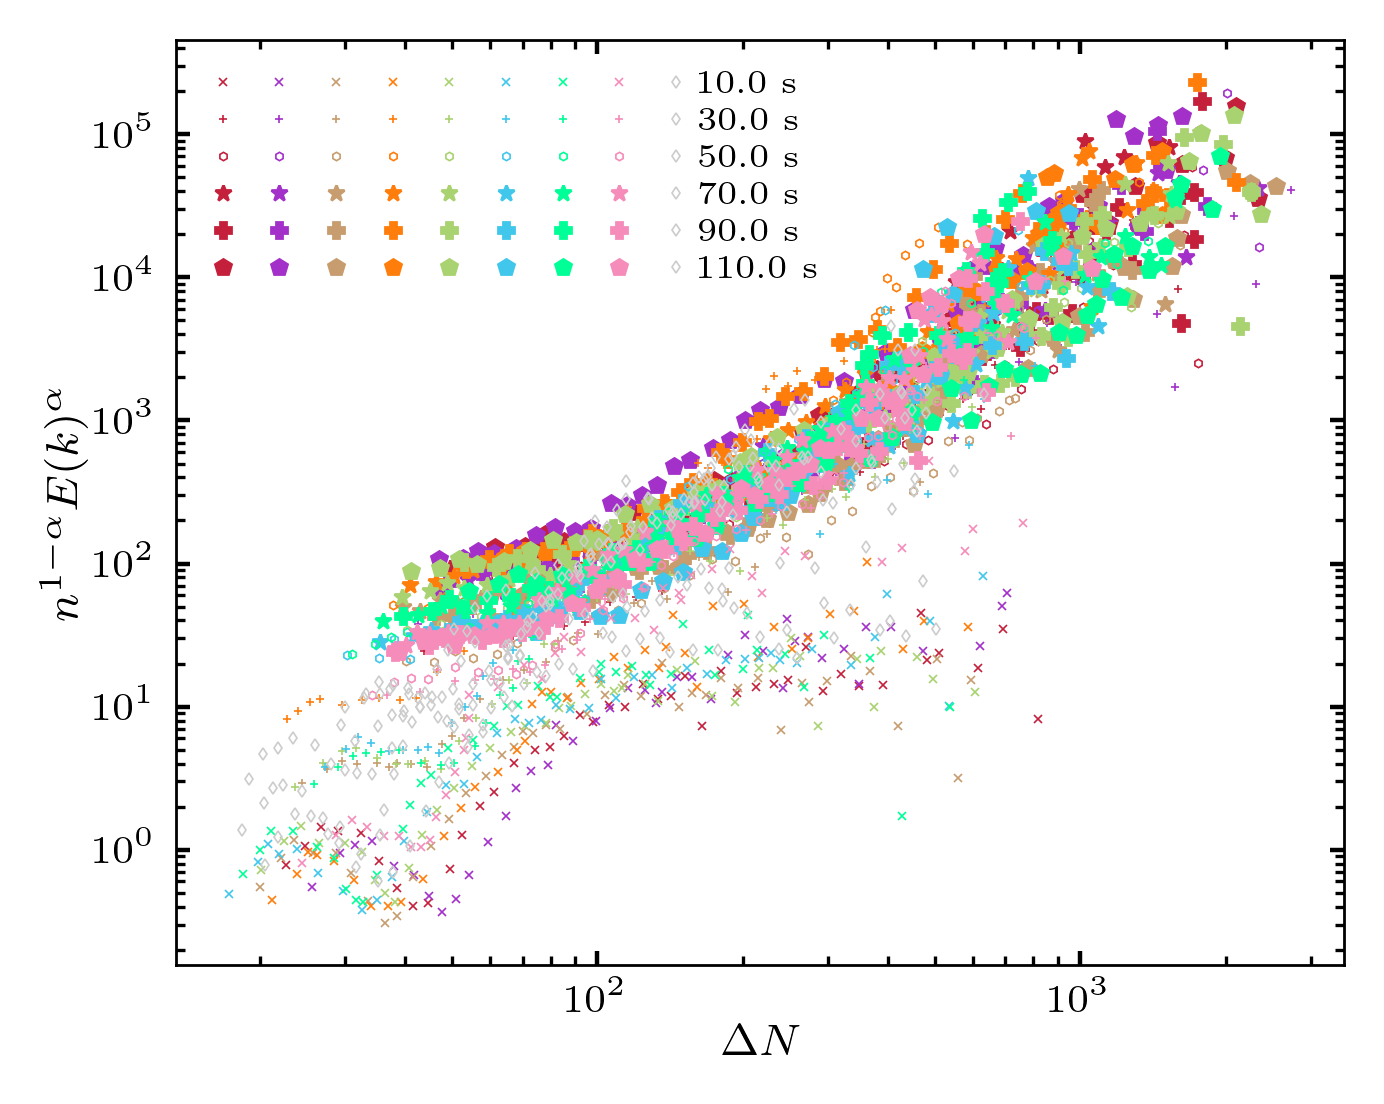

In [31]:
data_master = os.path.join(data_master_dir, r'Research projects\DF\data\transient-GNF-energy-dN\{1}\{0}\{2:02d}\{3}')
df_flag = 'df2_kinetics'
es_flag = 'energy_spectra'
df_file = 'nGNF_data.csv'
es_file = 'energy_spectra.csv'
alpha = 1

df = {}
es = {}
conc, folders, sample_num = tentative_log()
for date, r, c in zip(folders, sample_num, conc):
    n = r[2]
    df[str(c)] = pd.read_csv(data_master.format(df_flag, date, n, df_file)).set_index('l_r')
    es[str(c)] = pd.read_csv(data_master.format(es_flag, date, n, es_file)).set_index('l_r').sort_index()
    
bounds = [10, 3000]
fig, ax = plt.subplots(figsize=(3.5, 2.8))
for sample_n, kw in enumerate(df):
#     tau = clv_df.loc[int(kw)].avg
    n = int(kw) * n0_to_vf / 100 / vb
    if int(kw) > 30:
        for num, t in enumerate(range(300, 3500, 600)):
            if t < 2000:
                ax.plot(df[kw][str(t)][bounds[0]: bounds[1]], n ** (1-alpha) * (es[kw][str(t)][bounds[0]: bounds[1]]) ** alpha, 
                        marker=marker_list[6-num], markersize=1.5, mfc=(0,0,0,0),
                        mew=0.3, mec=wowcolor(color_dict[kw]), ls='', label=' ')
            else:
                ax.plot(df[kw][str(t)][bounds[0]: bounds[1]], n ** (1-alpha) * (es[kw][str(t)][bounds[0]: bounds[1]]) ** alpha, 
                        marker=marker_list[6-num], markersize=3, ls='', 
                        mew=0.5, label=' ', color=wowcolor(color_dict[kw]))
    elif int(kw) == 30:
        for num, t in enumerate(range(300, 3500, 600)):
            ax.plot(df[kw][str(t)][bounds[0]: bounds[1]], n ** (1-alpha) * (es[kw][str(t)][bounds[0]: bounds[1]]) ** alpha, 
                    marker=marker_list[sample_n], markersize=1.5, mfc=(0,0,0,0),
                    mew=0.3, mec=(0.8, 0.8, 0.8), ls='', label='{:.1f} s'.format(t/30))
ax.legend(loc='upper left', fontsize=6, ncol=9)
ax.loglog()

ax.set_xlabel('$\Delta N$')
ax.set_ylabel('$n^{1-\\alpha}E(k)^\\alpha$')

# ax.set_xlim([1, 16])
# ax.set_ylim([1e-5, 5e0])

# fitting curve
# x = np.linspace(50, 2000, 100)
# y = np.exp(p[0] * np.log(x)**2 + p[1]*np.log(x) + p[2])
# ax.plot(x, y, ls='--', lw=1.5, color='black')
# ax.set_ylim([0.09, 1e3])

# slope
# x = np.array([600, 2000])
# y = x ** 1 * 0.1
# ax.plot(x, y, ls='--', lw=1.5, color='black')

plt.tight_layout()

fig.savefig(os.path.join(data_master_dir, r'Research projects\DF\Figures\GNF-energy-correlation-transient\E-GNF-transient-alpha-1.pdf'))